In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

# 参数设置

# 训练参数 
除了路径 其他不要变

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   

args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"              
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 128                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 150

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = False if torch.cuda.is_available() else False
args.gpu                     = 0
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

## 数据参数



In [3]:
args.seed                             = 3


args.data_name                        =  "hapt"
window_seconds                        = 2.56
args.wavelet_filtering                = True
args.wavelet_filtering_regularization = True
args.regulatization_tradeoff          = 0.0001
args.number_wavelet_filtering = 10


args.difference       = False 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"

config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]

if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



## 模型参数

In [4]:
args.filter_scaling_factor = 1
args.model_type              = "deepconvlstm"

# 实验

In [5]:
exp = Exp(args)

Use CPU
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Done!
Parameter : 474879
Set the seed as :  3


 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 10 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.00066667 0.00068027 0.00074074 0.00061013 0.00056497 0.00056754
 0.00724638 0.0106383  0.00621118 0.0070922  0.00571429 0.00719424]
================Skip the 0 CV Experiment================
================ the 1 th CV Experiment ================ 
Leave one Out Experiment : The 2 Part as the test
[-] Target sampling weights:  [0.00065189 0.0006689  0.00073584 0.00061501 0.00055866 0.0005685
 0.00763359 0.01020408 0.00666667 0.00719424 0.00598802 0.00689655]
================ Build the model ================ 
Wavelet Filtering Regularization
Build the

Epoch: 26 cost time: 76.32000494003296
VALI: Epoch: 26, Steps: 82 | Train Loss: 0.0571338  Vali Loss: 0.1155725 Vali Accuracy: 0.9558442  Vali weighted F1: 0.9553785  Vali macro F1 0.8362863 
EarlyStopping counter: 5 out of 15
Learning rate adjusting counter: 5 out of 5
Updating learning rate to 1e-05
Epoch: 27 cost time: 75.42074203491211
VALI: Epoch: 27, Steps: 82 | Train Loss: 0.0552169  Vali Loss: 0.1153756 Vali Accuracy: 0.9541126  Vali weighted F1: 0.9537959  Vali macro F1 0.8348942 
EarlyStopping counter: 6 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 28 cost time: 77.93169569969177
VALI: Epoch: 28, Steps: 82 | Train Loss: 0.0535427  Vali Loss: 0.1158197 Vali Accuracy: 0.9541126  Vali weighted F1: 0.9537959  Vali macro F1 0.8348942 
EarlyStopping counter: 7 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 29 cost time: 76.39491319656372
VALI: Epoch: 29, Steps: 82 | Train Loss: 0.0523433  Vali Loss: 0.1155956 Vali Accuracy: 0.9541126  Vali weighted F1:

Epoch: 17 cost time: 76.91407084465027
VALI: Epoch: 17, Steps: 82 | Train Loss: 0.0981959  Vali Loss: 0.1191597 Vali Accuracy: 0.9578676  Vali weighted F1: 0.9557920  Vali macro F1 0.8534188 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 18 cost time: 77.04914617538452
VALI: Epoch: 18, Steps: 82 | Train Loss: 0.0984961  Vali Loss: 0.1038369 Vali Accuracy: 0.9604471  Vali weighted F1: 0.9594272  Vali macro F1 0.8760440 
EarlyStopping counter: 3 out of 15
Learning rate adjusting counter: 3 out of 5
Epoch: 19 cost time: 75.96370792388916
VALI: Epoch: 19, Steps: 82 | Train Loss: 0.0989198  Vali Loss: 0.1095220 Vali Accuracy: 0.9518487  Vali weighted F1: 0.9493145  Vali macro F1 0.8273171 
EarlyStopping counter: 4 out of 15
Learning rate adjusting counter: 4 out of 5
Epoch: 20 cost time: 73.73878455162048
VALI: Epoch: 20, Steps: 82 | Train Loss: 0.0884116  Vali Loss: 0.1060888 Vali Accuracy: 0.9630267  Vali weighted F1: 0.9614893  Vali macro F1 0.8722

Test data number :  6195
Epoch: 1 cost time: 79.86896657943726
VALI: Epoch: 1, Steps: 82 | Train Loss: 0.9830009  Vali Loss: 0.4241101 Vali Accuracy: 0.8445596  Vali weighted F1: 0.8330994  Vali macro F1 0.5303645 
Validation loss decreased (inf --> 0.424110).  Saving model ...
Epoch: 2 cost time: 82.36747002601624
VALI: Epoch: 2, Steps: 82 | Train Loss: 0.3343753  Vali Loss: 0.2864358 Vali Accuracy: 0.8946459  Vali weighted F1: 0.8878135  Vali macro F1 0.6715659 
new best score!!!!
Validation loss decreased (0.424110 --> 0.286436).  Saving model ...
new best score!!!!
Epoch: 3 cost time: 90.95345854759216
VALI: Epoch: 3, Steps: 82 | Train Loss: 0.2607599  Vali Loss: 0.2897323 Vali Accuracy: 0.8946459  Vali weighted F1: 0.8903794  Vali macro F1 0.7182082 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 4 cost time: 92.02488255500793
VALI: Epoch: 4, Steps: 82 | Train Loss: 0.2267556  Vali Loss: 0.2429350 Vali Accuracy: 0.9093264  Vali weighted F1: 0

Epoch: 30 cost time: 86.86404705047607
VALI: Epoch: 30, Steps: 82 | Train Loss: 0.0489914  Vali Loss: 0.1269929 Vali Accuracy: 0.9671848  Vali weighted F1: 0.9664801  Vali macro F1 0.8816908 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 31 cost time: 85.56276488304138
VALI: Epoch: 31, Steps: 82 | Train Loss: 0.0478010  Vali Loss: 0.1263421 Vali Accuracy: 0.9706390  Vali weighted F1: 0.9701246  Vali macro F1 0.8958025 
EarlyStopping counter: 3 out of 15
Learning rate adjusting counter: 3 out of 5
Epoch: 32 cost time: 83.70634245872498
VALI: Epoch: 32, Steps: 82 | Train Loss: 0.0470777  Vali Loss: 0.1358541 Vali Accuracy: 0.9680484  Vali weighted F1: 0.9675589  Vali macro F1 0.8988330 
EarlyStopping counter: 4 out of 15
Learning rate adjusting counter: 4 out of 5
Epoch: 33 cost time: 83.94543480873108
VALI: Epoch: 33, Steps: 82 | Train Loss: 0.0476350  Vali Loss: 0.1323494 Vali Accuracy: 0.9671848  Vali weighted F1: 0.9665901  Vali macro F1 0.8882

Epoch: 14 cost time: 90.95836806297302
VALI: Epoch: 14, Steps: 81 | Train Loss: 0.1404978  Vali Loss: 0.1412372 Vali Accuracy: 0.9504778  Vali weighted F1: 0.9448610  Vali macro F1 0.7798027 
new best score!!!!
Validation loss decreased (0.151939 --> 0.141237).  Saving model ...
new best score!!!!
Epoch: 15 cost time: 91.48131918907166
VALI: Epoch: 15, Steps: 81 | Train Loss: 0.1335801  Vali Loss: 0.1745771 Vali Accuracy: 0.9304952  Vali weighted F1: 0.9279306  Vali macro F1 0.7388467 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 16 cost time: 89.79281902313232
VALI: Epoch: 16, Steps: 81 | Train Loss: 0.1303961  Vali Loss: 0.1698445 Vali Accuracy: 0.9339705  Vali weighted F1: 0.9308022  Vali macro F1 0.7552396 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 17 cost time: 89.33512139320374
VALI: Epoch: 17, Steps: 81 | Train Loss: 0.1198830  Vali Loss: 0.1490404 Vali Accuracy: 0.9417897  Vali weighted F1: 0.9

Epoch: 4 cost time: 85.40554094314575
VALI: Epoch: 4, Steps: 80 | Train Loss: 0.2408282  Vali Loss: 0.2500206 Vali Accuracy: 0.9130053  Vali weighted F1: 0.9066668  Vali macro F1 0.7147268 
new best score!!!!
Validation loss decreased (0.274034 --> 0.250021).  Saving model ...
new best score!!!!
Epoch: 5 cost time: 85.38520669937134
VALI: Epoch: 5, Steps: 80 | Train Loss: 0.2130230  Vali Loss: 0.2169746 Vali Accuracy: 0.9182777  Vali weighted F1: 0.9162641  Vali macro F1 0.7522942 
new best score!!!!
Validation loss decreased (0.250021 --> 0.216975).  Saving model ...
new best score!!!!
Epoch: 6 cost time: 85.56993412971497
VALI: Epoch: 6, Steps: 80 | Train Loss: 0.1901006  Vali Loss: 0.2238697 Vali Accuracy: 0.9244288  Vali weighted F1: 0.9203308  Vali macro F1 0.7614656 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 7 cost time: 85.3016746044159
VALI: Epoch: 7, Steps: 80 | Train Loss: 0.1759924  Vali Loss: 0.1769916 Vali Accuracy: 0.9367311  Va

KeyboardInterrupt: 

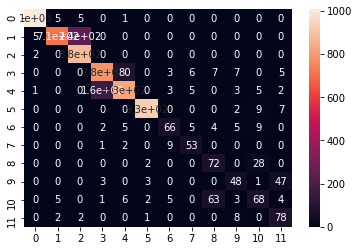

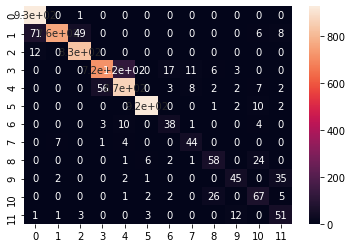

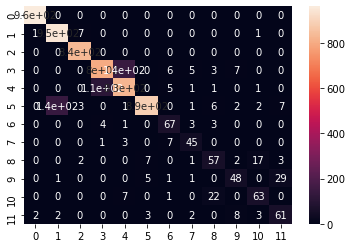

Error in callback <function flush_figures at 0x000001EE96A751F0> (for post_execute):


KeyboardInterrupt: 

In [6]:
exp.train()